In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [37]:
diabetes=pd.read_csv('F:\Kaggle Data Sets\diabetes.csv')

In [38]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
diabetes.shape


(768, 9)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


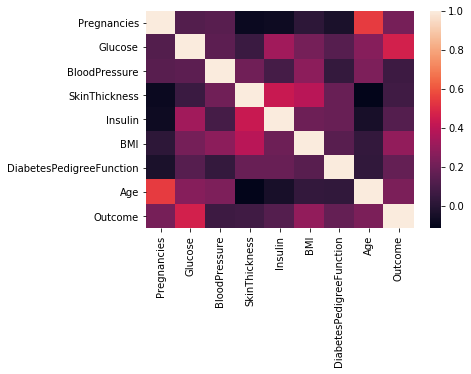

In [6]:
sns.heatmap(diabetes.corr())

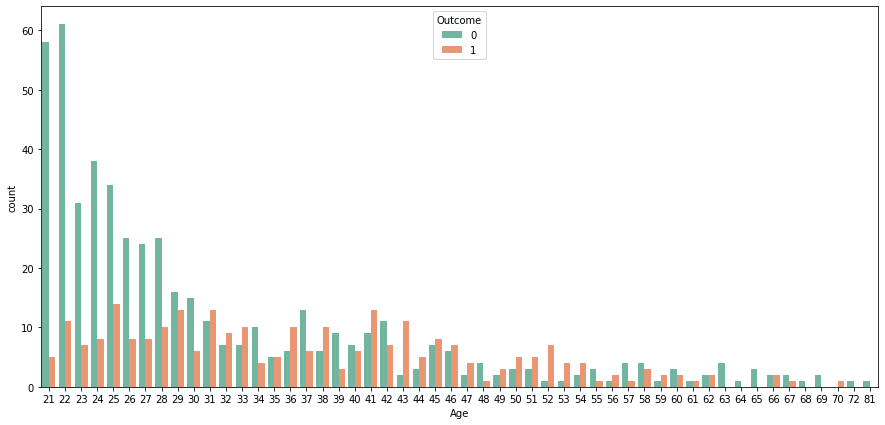

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(x='Age',hue='Outcome',data=diabetes,palette='Set2')

### We can observe that from age 38-54 more diabetes positive patients are there as compared to diabetic negative

In [14]:
diabetes.Age.nunique()

52

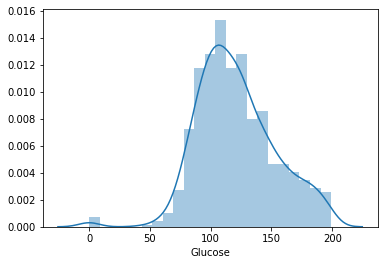

In [41]:
sns.distplot(diabetes['Glucose'])

In [42]:
diabetes[diabetes['Outcome']==1].Glucose.mean()

141.25746268656715

In [43]:
diabetes[diabetes['Outcome']==0].Glucose.mean()

109.98

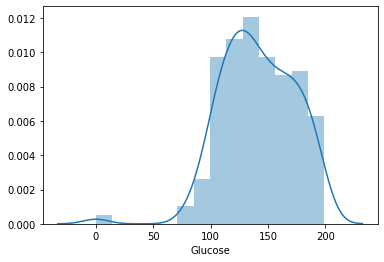

In [44]:
sns.distplot(diabetes[diabetes['Outcome']==1].Glucose)

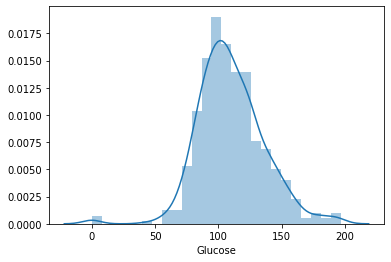

In [45]:
sns.distplot(diabetes[diabetes['Outcome']==0].Glucose)

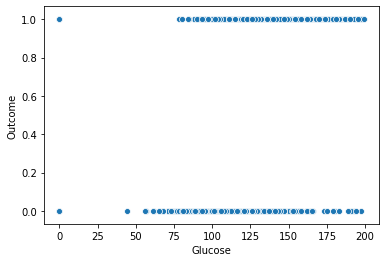

In [46]:
sns.scatterplot(x='Glucose',y='Outcome',data=diabetes)

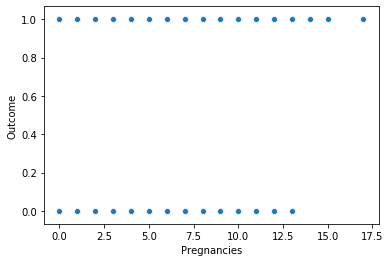

In [47]:
sns.scatterplot(x='Pregnancies',y='Outcome',data=diabetes)

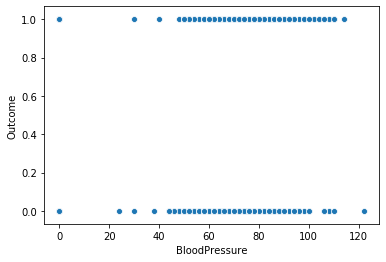

In [48]:
sns.scatterplot(x='BloodPressure',y='Outcome',data=diabetes)

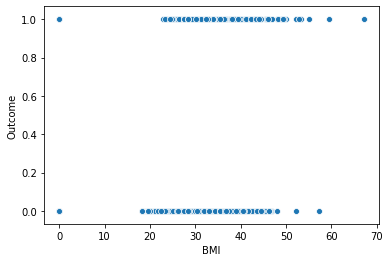

In [49]:
sns.scatterplot(x='BMI',y='Outcome',data=diabetes)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X=diabetes.drop('Outcome',axis=1)

In [52]:
y=diabetes['Outcome']

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [59]:
X_train_stand=X_train.copy()
X_test_stand=X_test.copy()

In [60]:
X_train_stand.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
709,2,93,64,32,160,38.0,0.674,23
425,4,184,78,39,277,37.0,0.264,31
135,2,125,60,20,140,33.8,0.088,31
630,7,114,64,0,0,27.4,0.732,34
500,2,117,90,19,71,25.2,0.313,21


In [61]:
for i in X_train_stand.columns:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [64]:
X_train_stand.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-2.133653e-17,1.484516e-16,-1.821855e-16,5.930833e-17,1.544186e-16,-4.800720e-17,9.655686e-17,-1.645445e-16
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.131907e+00,-3.749354e+00,-3.566237e+00,-1.286191e+00,-6.938355e-01,-4.089322e+00,-1.225300e+00,-1.029931e+00
25%,-8.303922e-01,-6.698460e-01,-2.606857e-01,-1.286191e+00,-6.938355e-01,-5.955986e-01,-7.258213e-01,-7.779880e-01
50%,-2.273634e-01,-1.410415e-01,1.525083e-01,1.508018e-01,-3.866070e-01,7.862688e-03,-2.929397e-01,-3.580824e-01
75%,6.771797e-01,6.366121e-01,5.657022e-01,7.131035e-01,3.793308e-01,5.795629e-01,5.008055e-01,6.496911e-01
max,3.993838e+00,2.440769e+00,2.734970e+00,4.899127e+00,6.526035e+00,4.435363e+00,5.620269e+00,3.253106e+00


## Appying Logistic Regression Model

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr=LogisticRegression()

In [81]:
lr.fit(X_train_stand,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
lr.score(X_test_stand,y_test)

0.7987012987012987

In [83]:
y_pred_lr=lr.predict(X_test_stand)
y_pred_lr

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

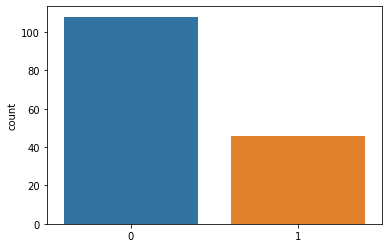

In [84]:
sns.countplot(y_pred_lr)

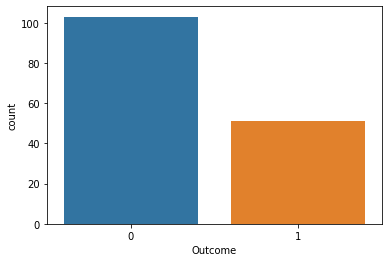

In [85]:
sns.countplot(y_test)

## Applying KNN model

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn_1=KNeighborsClassifier(n_neighbors=1) # k=1

In [87]:
knn_1.fit(X_train_stand,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [88]:
y_pred_knn_1=knn_1.predict(X_test_stand)

#### Predictions and Evaluations

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print(classification_report(y_test,y_pred_knn_1))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       103
           1       0.56      0.53      0.55        51

    accuracy                           0.71       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.70      0.71      0.71       154



In [94]:
print(confusion_matrix(y_test,y_pred_knn_1))

[[82 21]
 [24 27]]


#### Finding optimum value of k using elbow method

In [96]:
error_rate=list()
for i in range(1,50):
    knn_i=KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train_stand,y_train)
    pred_i=knn_i.predict(X_test_stand)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'error_rate')

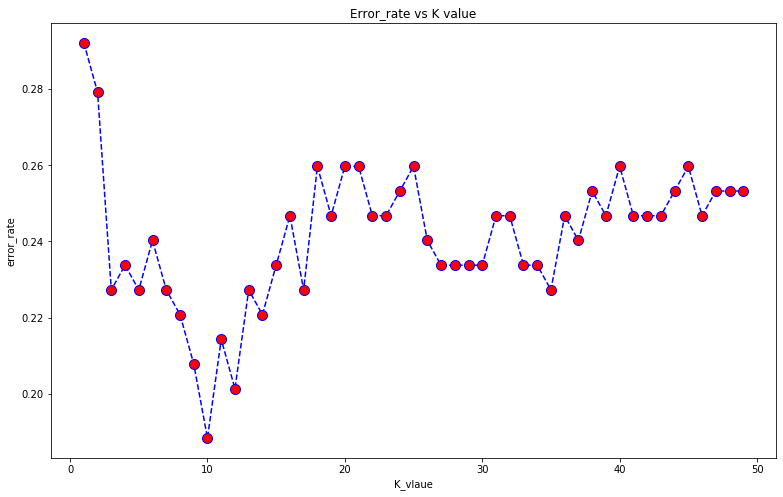

In [97]:
plt.figure(figsize=(13,8))
plt.plot(range(1,50),error_rate,color='blue',marker='o',markerfacecolor='red',linestyle='dashed',markersize=10)
plt.title('Error_rate vs K value')
plt.xlabel('K_vlaue')
plt.ylabel('error_rate')

#### we can clearly see from the graph that optimum k value is K=10

In [98]:
knn_10=KNeighborsClassifier(n_neighbors=10)

In [100]:
knn_10.fit(X_train_stand,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [101]:
y_pred_knn10=knn_10.predict(X_test_stand)

In [102]:
print(classification_report(y_test,y_pred_knn10))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       103
           1       0.81      0.57      0.67        51

    accuracy                           0.81       154
   macro avg       0.81      0.75      0.77       154
weighted avg       0.81      0.81      0.80       154



# Conclusions:
    1. Logistic Regression model has score of 0.79
    2. KNN model with k=1 has accuracy of 0.67
    3. KNN model with k=10 has accuracy of 0.81 . Hence this is the preferred prediction model